In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [22]:
#Datase loading
diabetes=load_diabetes()
X=pd.DataFrame(diabetes.data,columns=diabetes.feature_names) 
y=diabetes.target

In [23]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [24]:
#train_test_Split
'''We split the dataset into two (or more) parts to test how well your model performs on unseen data.
👉 In short:
We train on one part (train set) and test on the other (test set) to simulate real-world performance.
'''
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#standardization
'''Standardization (also called Z-score normalization) is the process of scaling features so that they have:
Mean = 0
Standard Deviation = 1
The formula is: 𝑋𝑠𝑡𝑎𝑛𝑑𝑎𝑟𝑑𝑖𝑧𝑒𝑑=(𝑋−𝜇)/𝜎
'''
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [26]:
#Model training 
model=LinearRegression()
model.fit(x_train,y_train)
'''This trains the model using your training data.
It finds the best-fitting line (or hyperplane) that minimizes the error between predictions and actual y_train values.
For simple linear regression, it's finding:
𝑦^=𝑤1𝑥1+𝑤2𝑥2+⋯+𝑤𝑛𝑥𝑛+𝑏
Where:
𝑤1,𝑤2,…,𝑤𝑛
are the weights/coefficients (slopes)
b is the intercept'''
print(model.coef_)       # prints the learned Weights
print(model.intercept_)  # prints the bias term

[  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
153.73654390934846


In [27]:
#model Evaluation
'''Note: we always make prediction based on the test data after training the model on the training data 
in an order to see hopw well it perform on unseen data-thats your x_test'''
y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
''' R² Score:(coefficient of determination)
Measures how well the model’s predictions approximate the actual values.
Ranges from -∞ to 1.
𝑅^2=1
R^2=1: perfect predictions
𝑅^2=0: model does no better than predicting the mean
𝑅^2<0: worse than a dumb average'''

MAE: 42.79409467959994
MSE: 2900.1936284934823
RMSE: 53.853445836765935
R² Score: 0.45260276297191926


' R² Score:(coefficient of determination)\nMeasures how well the model’s predictions approximate the actual values.\nRanges from -∞ to 1.\n𝑅^2=1\nR^2=1: perfect predictions\n𝑅^2=0: model does no better than predicting the mean\n𝑅^2<0: worse than a dumb average'

In [28]:
#cross Validation
'''Cross-validation is a technique used to evaluate how well your model will perform on unseen data.
Instead of just splitting your dataset into train and test, it does multiple splits to test the model more thoroughly.'''
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.54760189 0.36123934 0.50481226 0.61773622 0.21489265]
Average R² Score: 0.4492564741221218


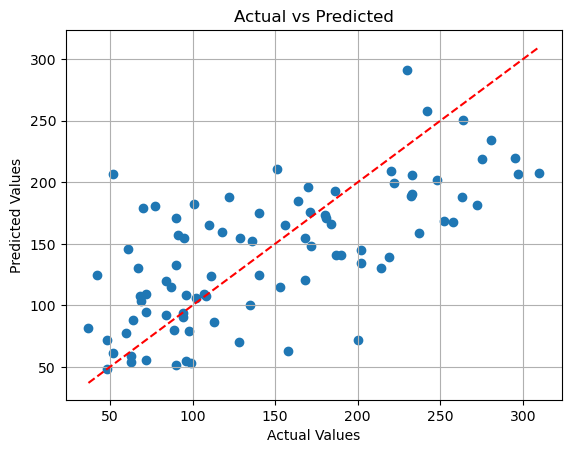

In [29]:
#plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

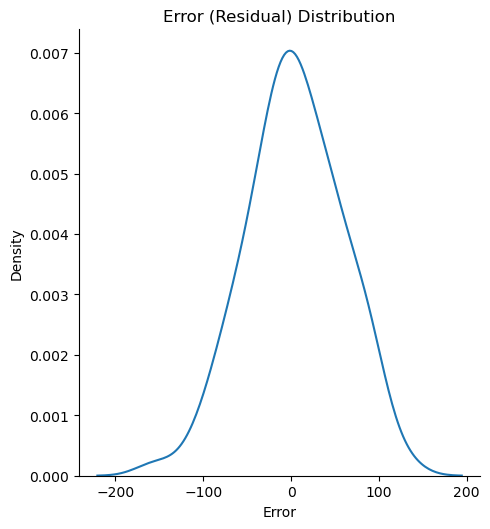

In [30]:
#residual analysis
residuals = y_test - y_pred
sns.displot(residuals, kind='kde')
plt.title("Error (Residual) Distribution")
plt.xlabel("Error")
plt.show()

In [31]:
# Print raw scaled prediction

In [32]:
result=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
result

,Actual,Predict
0,219.0,139.547558
1,70.0,179.517208
2,202.0,134.038756
3,230.0,291.417029
4,111.0,123.789659
...,...,...
84,153.0,115.011800
85,98.0,78.955842
86,37.0,81.560873
87,63.0,54.379973
